In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

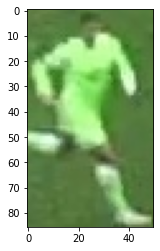

In [2]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# Take top half of image

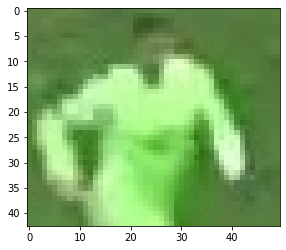

In [3]:
top_half_image = image[0:image.shape[0]//2, :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

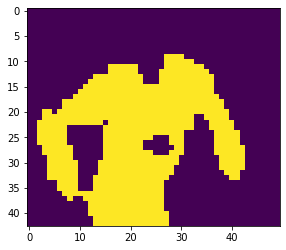

In [5]:
# Reshape the image into a 2D array
image_2d = top_half_image.reshape(-1, 3)

# Perform K-Means clustering with two clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape labels into original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display clustered image
plt.imshow(clustered_image)
plt.show()

In [6]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [7]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [ ]:
kmeans.cluster_centers_[player_cluster]